<a href="https://colab.research.google.com/github/Mukti-J/Exercise/blob/main/Tugas%204%20ML/Tugas_4_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!pip3 install -U ucimlrepo

In [8]:
from ucimlrepo import fetch_ucirepo, list_available_datasets

# fetch dataset
liver_disorders = fetch_ucirepo(id=60)

# data (as pandas dataframes)
X = liver_disorders.data.features
y = liver_disorders.data.targets

# metadata
print(liver_disorders.metadata)

# variable information
print(liver_disorders.variables)

{'uci_id': 60, 'name': 'Liver Disorders', 'repository_url': 'https://archive.ics.uci.edu/dataset/60/liver+disorders', 'data_url': 'https://archive.ics.uci.edu/static/public/60/data.csv', 'abstract': 'BUPA Medical Research Ltd. database donated by Richard S. Forsyth', 'area': 'Health and Medicine', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 345, 'num_features': 5, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': [], 'target_col': ['drinks'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2016, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C54G67', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': 'The first 5 variables are all blood tests which are thought to be sensitive to liver disorders that might arise from excessive alcohol consumption. Each line in the dataset constitutes the record of a single male individual.\n\nImportant note: The 7

In [96]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.decomposition import PCA

In [81]:
# Load Dataset
liver_disorders = fetch_ucirepo(id=60)
X = liver_disorders.data.features
y = liver_disorders.data.targets

# Gabungkan data agar mudah diolah
df = X.copy()
df['label'] = y.iloc[:, 0] if isinstance(y, pd.DataFrame) else y

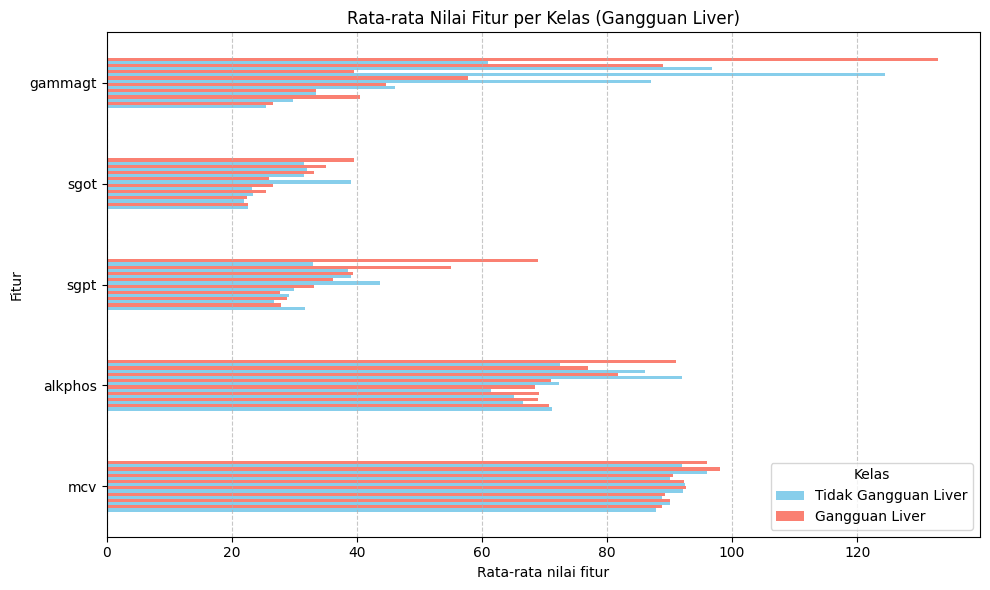

In [83]:
import matplotlib.pyplot as plt
import pandas as pd

# Gabungkan X dan y menjadi satu DataFrame
df = X.copy()
df['label'] = y.iloc[:,0]  # Pastikan y berbentuk Series/kolom tunggal

# Hitung rata-rata setiap fitur untuk tiap label
mean_per_class = df.groupby('label').mean().T  # Transpose agar fitur jadi sumbu-Y

# Plot horizontal bar untuk tiap fitur, per kelas
plt.figure(figsize=(10, 6))
mean_per_class.plot(kind='barh', ax=plt.gca(), color=['skyblue', 'salmon'])
plt.xlabel('Rata-rata nilai fitur')
plt.ylabel('Fitur')
plt.title('Rata-rata Nilai Fitur per Kelas (Gangguan Liver)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.legend(['Tidak Gangguan Liver', 'Gangguan Liver'], title='Kelas', loc='lower right')
plt.tight_layout()
plt.show()

# **Pertanyaan 1**

Bagaimana distribusi masing-masing fitur (mcv, alkphos, sgpt, sgot, gammagt, drinks) pada seluruh data?

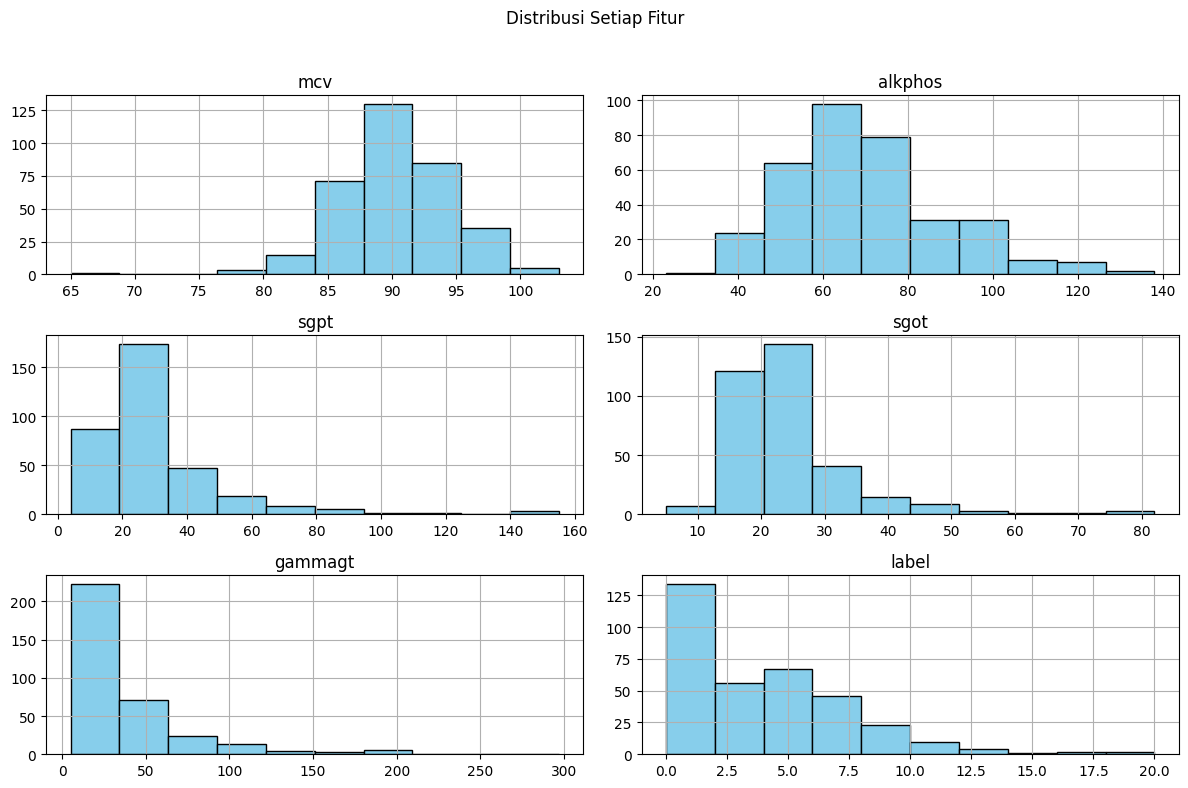

In [84]:
df.hist(figsize=(12, 8), color='skyblue', edgecolor='black')
plt.suptitle('Distribusi Setiap Fitur')
plt.tight_layout(rect=[0,0,1,0.96])
plt.show()

# **Pertanyaan 2**

Apakah terdapat korelasi yang kuat antara fitur-fitur tertentu dengan label gangguan liver?

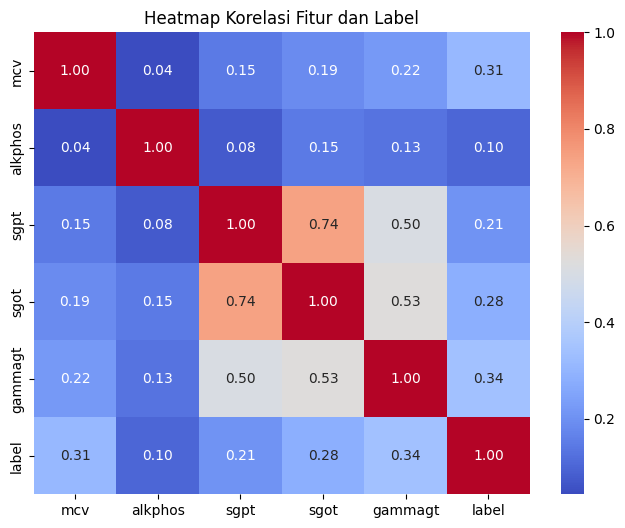

In [25]:
corr = df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Fitur dan Label')
plt.show()

# **Pertanyaan 3**

Apakah terdapat outlier pada fitur-fitur utama, dan bagaimana pengaruhnya terhadap label?

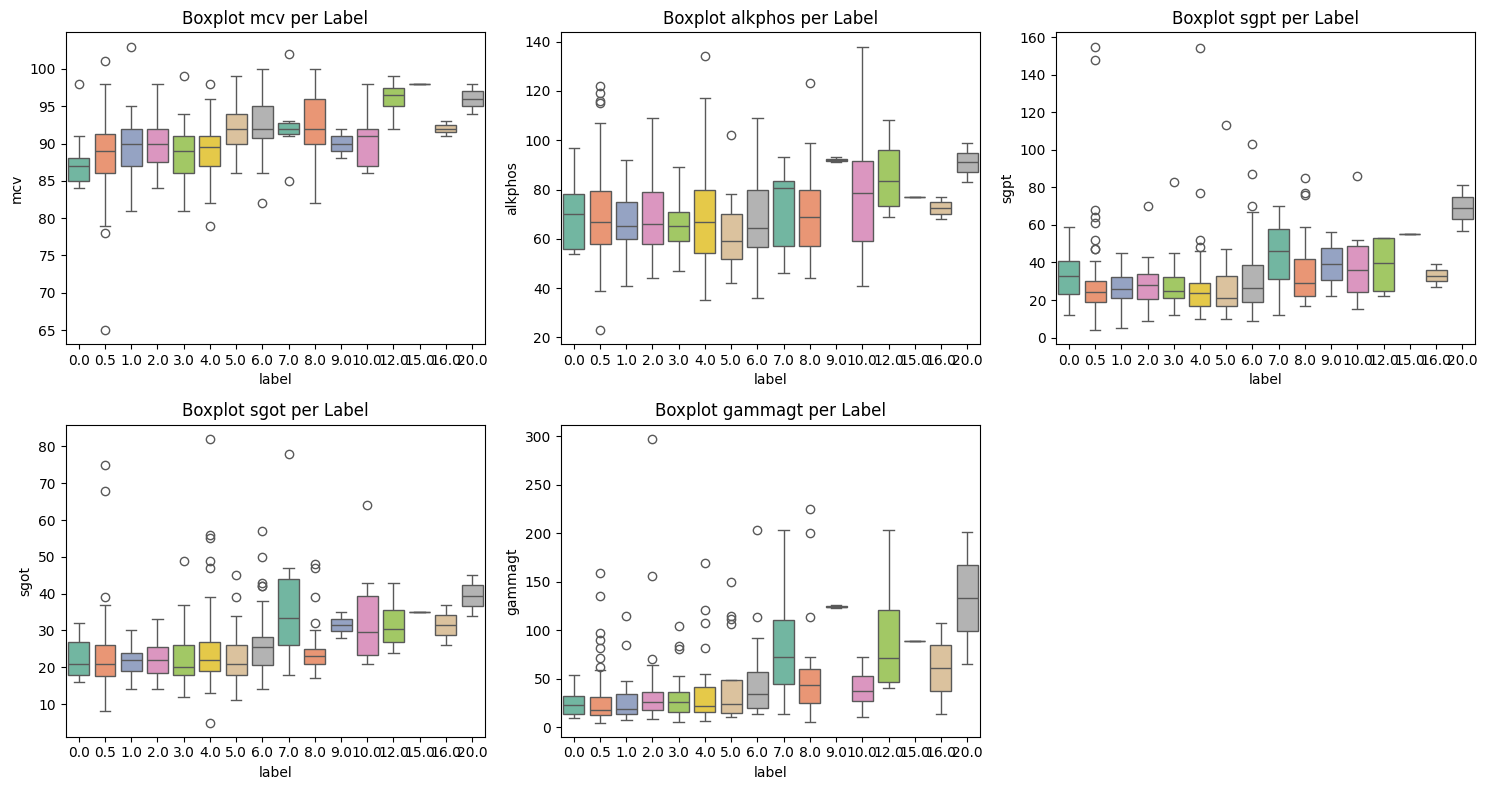

In [36]:
plt.figure(figsize=(15,8))
for i, col in enumerate(X.columns, 1):
    plt.subplot(2,3,i)
    sns.boxplot(x='label', y=col, data=df, palette='Set2', hue='label', legend=False)
    plt.title(f'Boxplot {col} per Label')
plt.tight_layout()
plt.show()

# **Pertanyaan 4**

Bagaimana perbedaan statistik deskriptif (mean, median, std, min, max) fitur-fitur antara pasien dengan gangguan liver dan tanpa gangguan liver?

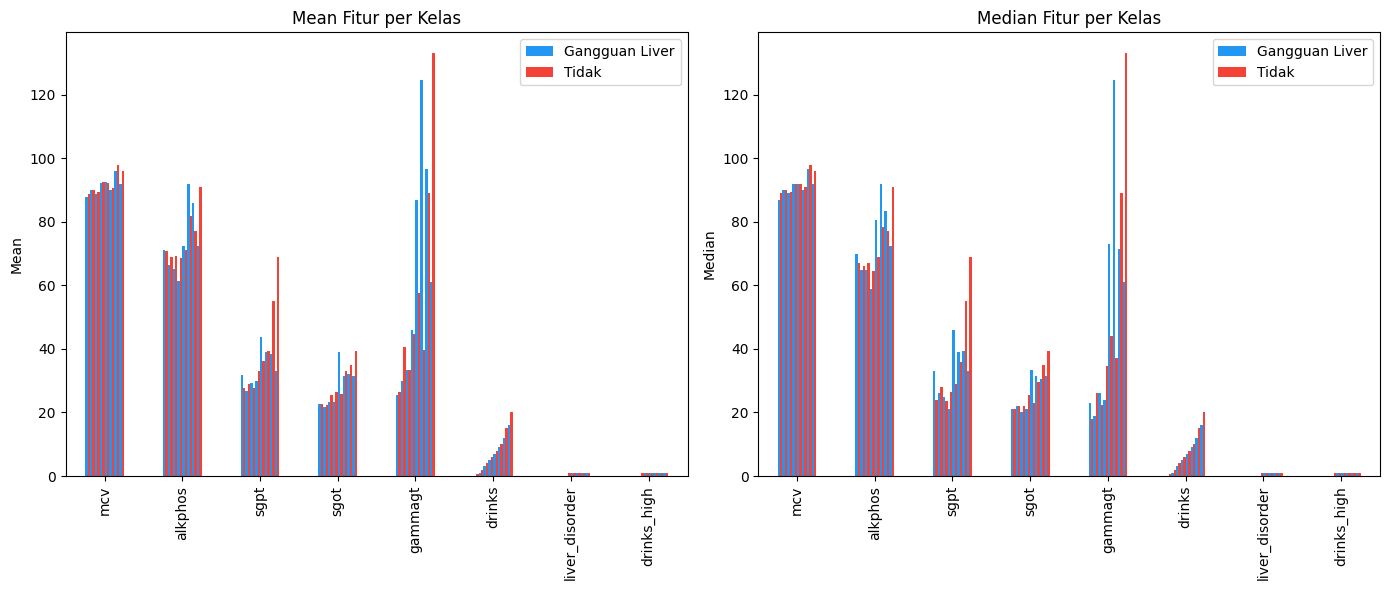

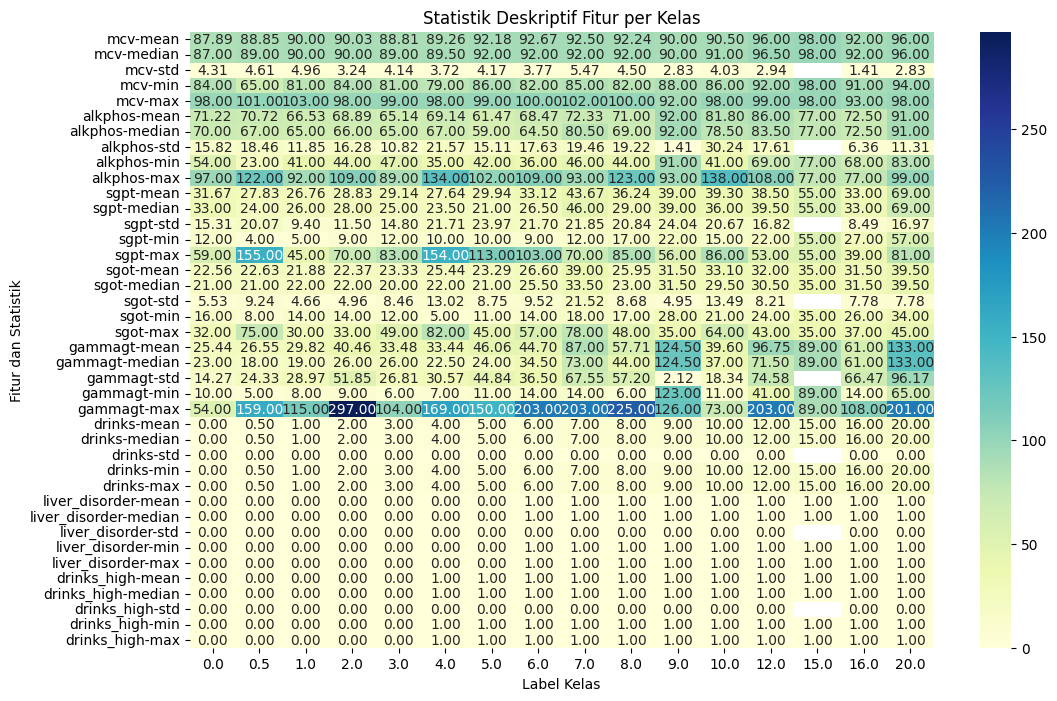

In [76]:
esc_stats = df.groupby('label').agg(['mean', 'median', 'std', 'min', 'max']).T
# Ambil hanya mean & median untuk visualisasi bar chart
desc_mean = df.groupby('label').mean().T
desc_median = df.groupby('label').median().T

# Grouped Bar Chart untuk Mean & Median
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
desc_mean.plot(kind='bar', ax=axs[0], color=['#2196F3', '#F44336'])
axs[0].set_title('Mean Fitur per Kelas')
axs[0].set_ylabel('Mean')
axs[0].legend(['Gangguan Liver', 'Tidak'])

desc_median.plot(kind='bar', ax=axs[1], color=['#2196F3', '#F44336'])
axs[1].set_title('Median Fitur per Kelas')
axs[1].set_ylabel('Median')
axs[1].legend(['Gangguan Liver', 'Tidak'])

plt.tight_layout()
plt.show()

# Heatmap statistik deskriptif (mean, median, std, min, max)
stat_full = df.groupby('label').agg(['mean', 'median', 'std', 'min', 'max']).T
plt.figure(figsize=(12, 8))
sns.heatmap(stat_full, annot=True, fmt=".2f", cmap='YlGnBu')
plt.title('Statistik Deskriptif Fitur per Kelas')
plt.xlabel('Label Kelas')
plt.ylabel('Fitur dan Statistik')
plt.show()

# **Pertanyaan 5**

Apakah konsumsi alkohol (“drinks”) signifikan berhubungan dengan gangguan liver?

In [104]:
df = X.copy()
df['label'] = y['drinks']

<ipython-input-97-4d59c831b748>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='label', y='drinks', data=df, palette='Set2')


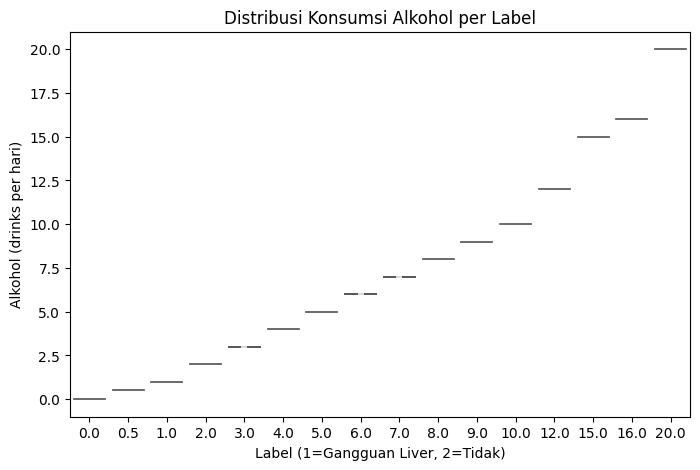

In [97]:
# Add 'drinks' column to df
df['drinks'] = y['drinks']

plt.figure(figsize=(8,5))
sns.boxplot(x='label', y='drinks', data=df, palette='Set1', hue='label', legend=False)
plt.title('Distribusi Konsumsi Alkohol per Label')
plt.xlabel('Label (1=Gangguan Liver, 2=Tidak)')
plt.ylabel('Alkohol (drinks per hari)')
plt.show()

# **Pertanyaan 6**

Fitur mana yang paling berkontribusi dalam membedakan pasien dengan dan tanpa gangguan liver?

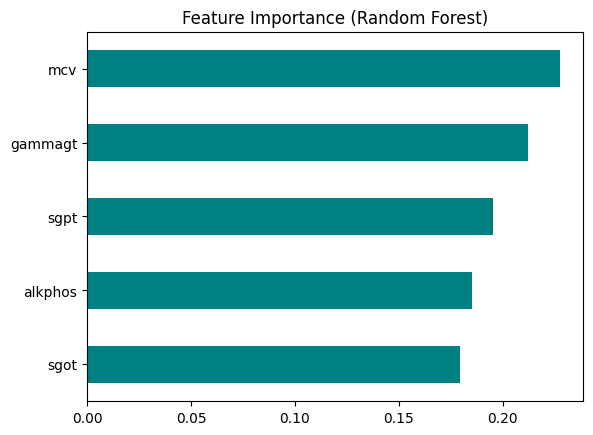

In [51]:
# Split data using the new binary 'liver_disorder' label
X_train, X_test, y_train, y_test = train_test_split(X, df['liver_disorder'], test_size=0.3, random_state=42)

# Train RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Get and plot feature importances
importances = rf.feature_importances_
feat_importances = pd.Series(importances, index=X.columns)
feat_importances.sort_values().plot(kind='barh', color='teal')
plt.title('Feature Importance (Random Forest)')
plt.show()

# **Pertanyaan 7**

Adakah kombinasi fitur yang membedakan dua kelompok secara visual?

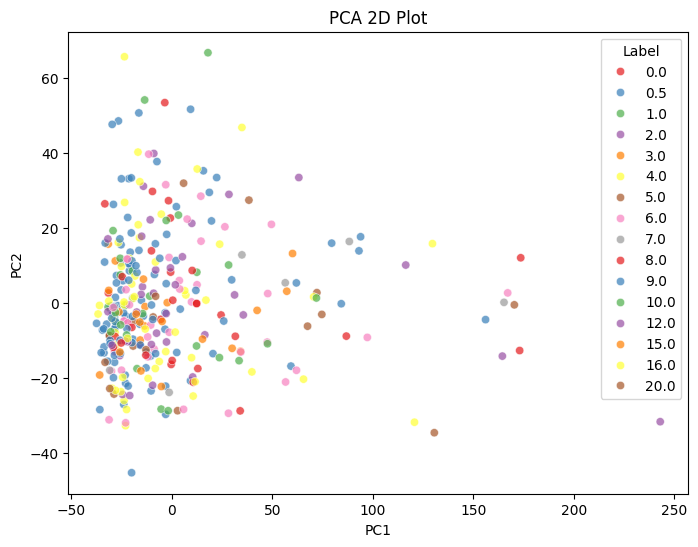

In [52]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)
plt.figure(figsize=(8,6))
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], hue=df['label'], palette='Set1', alpha=0.7)
plt.title('PCA 2D Plot')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Label')
plt.show()

# **Pertanyaan 8**

Apakah terdapat hubungan linier/multilinier antar fitur?

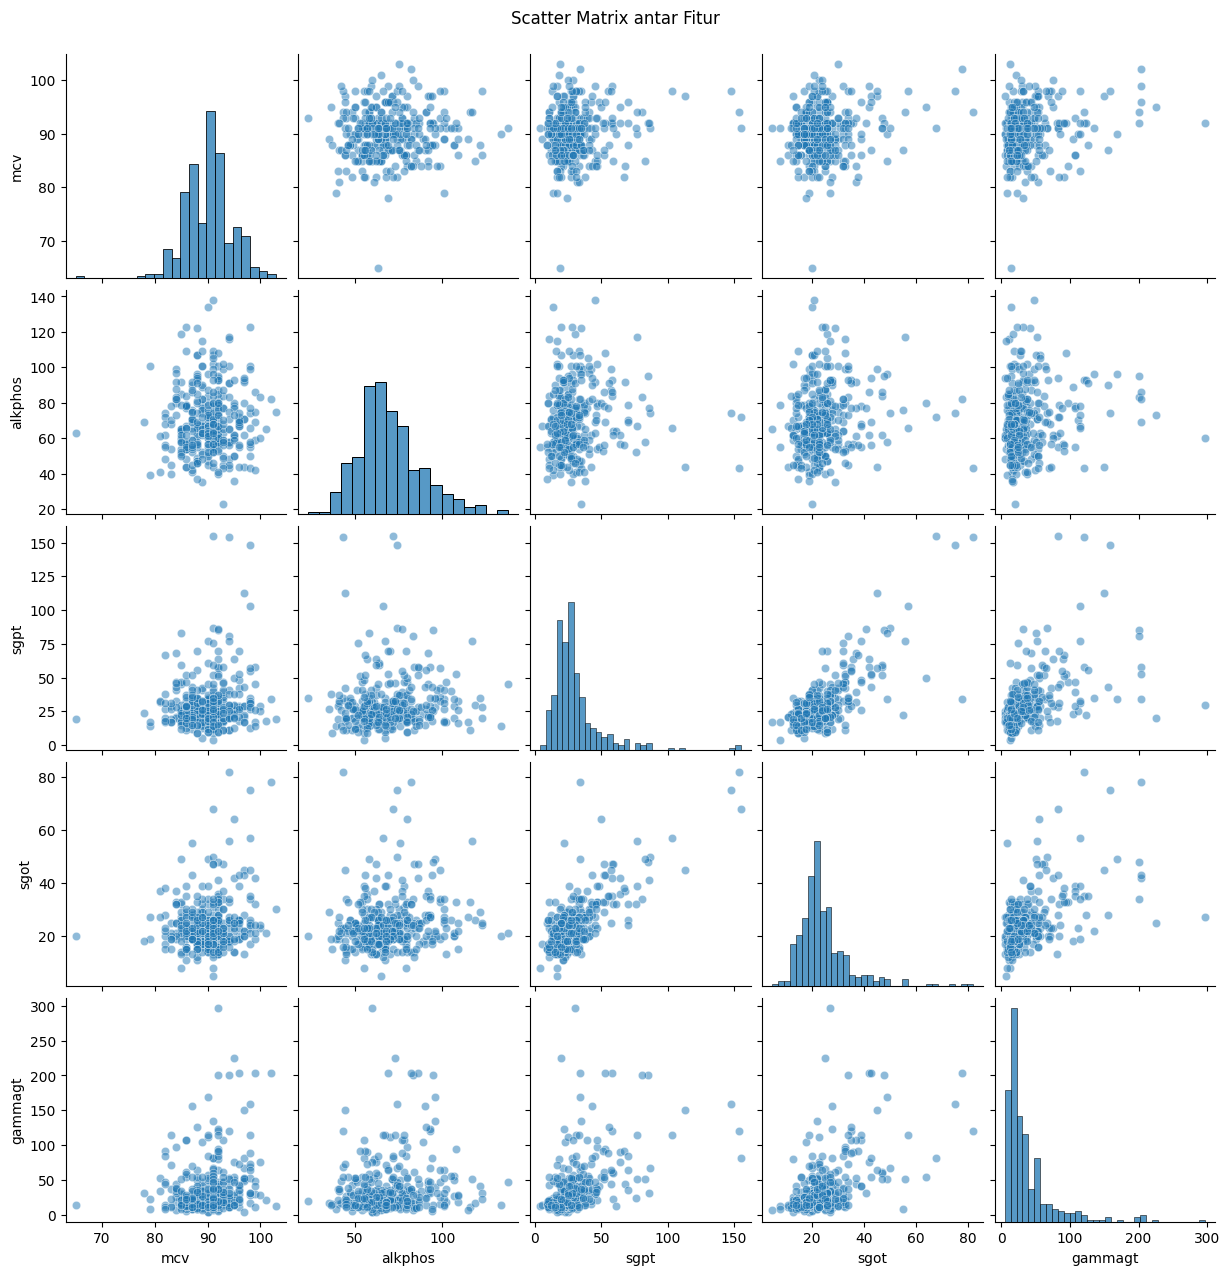

In [53]:
sns.pairplot(X, plot_kws={'alpha':0.5})
plt.suptitle('Scatter Matrix antar Fitur', y=1.02)
plt.show()

# **Pertanyaan 9**

Adakah pola konsumsi alkohol tertentu (contoh: drinks > 3) yang mendominasi pada pasien dengan gangguan liver?

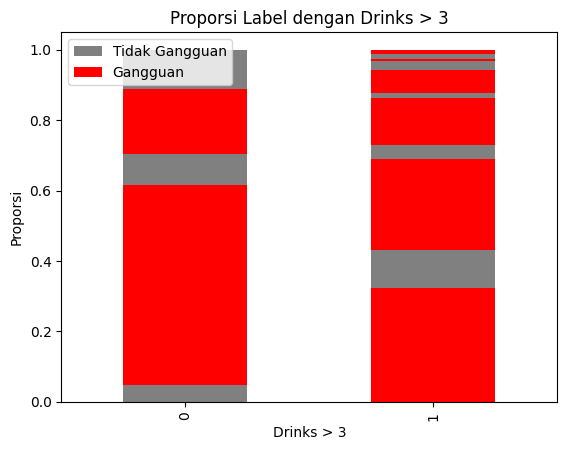

Proporsi label pada drinks > 3 dan <= 3:
label            0.0       0.5       1.0       2.0       3.0       4.0   \
drinks_high                                                               
0            0.047368  0.568421  0.089474  0.184211  0.110526  0.000000   
1            0.000000  0.000000  0.000000  0.000000  0.000000  0.322581   

label            5.0       6.0      7.0       8.0       9.0       10.0  \
drinks_high                                                              
0            0.000000  0.000000  0.00000  0.000000  0.000000  0.000000   
1            0.109677  0.258065  0.03871  0.135484  0.012903  0.064516   

label            12.0      15.0      16.0      20.0  
drinks_high                                          
0            0.000000  0.000000  0.000000  0.000000  
1            0.025806  0.006452  0.012903  0.012903  


In [54]:
threshold = 3
df['drinks_high'] = (df['drinks'] > threshold).astype(int)
cross_tab = pd.crosstab(df['drinks_high'], df['label'], normalize='index')
cross_tab.plot(kind='bar', stacked=True, color=['grey','red'])
plt.title(f'Proporsi Label dengan Drinks > {threshold}')
plt.xlabel(f'Drinks > {threshold}')
plt.ylabel('Proporsi')
plt.legend(['Tidak Gangguan', 'Gangguan'])
plt.show()
print("Proporsi label pada drinks > 3 dan <= 3:")
print(pd.crosstab(df['drinks_high'], df['label'], normalize='index'))

# **Pertanyaan 10**

Bagaimana distribusi label (gangguan liver vs tidak) secara umum pada dataset? Apakah dataset imbalance?

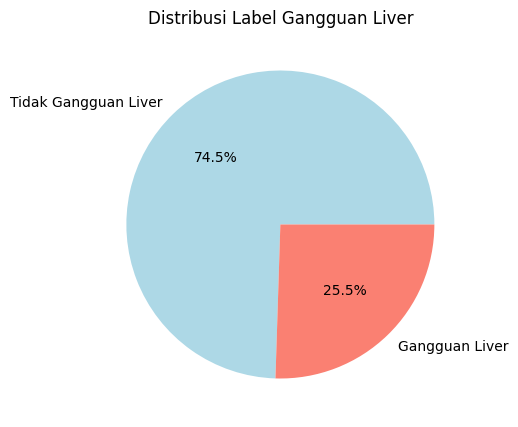

Jumlah per label:
 liver_disorder
0    257
1     88
Name: count, dtype: int64


In [56]:
label_counts = df['liver_disorder'].value_counts().sort_index()
plt.figure(figsize=(5,5))
plt.pie(label_counts, labels=['Tidak Gangguan Liver','Gangguan Liver'], autopct='%1.1f%%', colors=['lightblue','salmon'])
plt.title('Distribusi Label Gangguan Liver')
plt.show()
print("Jumlah per label:\n", label_counts)

# **Kesimpulan**

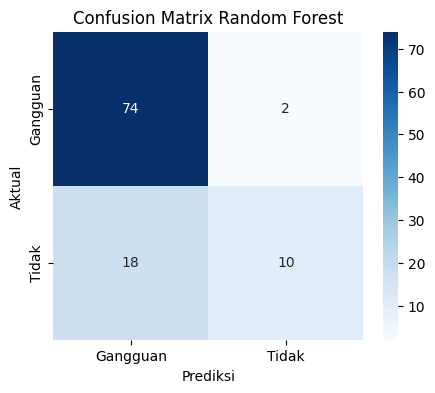

              precision    recall  f1-score   support

    Gangguan       0.80      0.97      0.88        76
       Tidak       0.83      0.36      0.50        28

    accuracy                           0.81       104
   macro avg       0.82      0.67      0.69       104
weighted avg       0.81      0.81      0.78       104



In [57]:
y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Gangguan','Tidak'], yticklabels=['Gangguan','Tidak'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix Random Forest')
plt.show()
print(classification_report(y_test, y_pred, target_names=['Gangguan','Tidak']))